### labolatorio 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Se importan las librerias que se haran uso

In [ ]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
import pandas as pd
from sklearn import preprocessing
import csv
%matplotlib inline

## Se utiliza la librerria pandas para el cargado de datos y posterior preprocesamiento

In [ ]:
#cargado de datos
df = pd.read_csv("/content/drive/MyDrive/IA/dataset/bank-full.csv", sep=";")
#uso de diccionarios para cambiar los datos
diccionario = {"no": 0, "yes": 1}
df["y"] = df["y"].replace(diccionario)
diccionario = {"no": 1, "yes": 2}
df["housing"] = df["housing"].replace(diccionario)
diccionario2 = {"married": 1, "single": 2, "divorced":3}
df["marital"] = df["marital"].replace(diccionario2)
diccionario3 = {"unknown": 1, "cellular": 2, "telephone":3}
df["contact"] = df["contact"].replace(diccionario3)
diccionario4 = {"ene": 13, "feb": 1, "mar":2, "apr":3, "may":4, "jan":5, "jul":6, "aug":7, "sep":8, "oct":9, "nov":10, "dec":11,"jun":12}
df["month"] = df["month"].replace(diccionario4)
diccionario5 = {"unknown": 12, "blue-collar": 1, "management":2, "technician":3, "admin.":4, "services":5, "retired":6, "self-employed":7, "entrepreneur":8, "unemployed":9, "housemaid":10, "student":11}
df["job"] = df["job"].replace(diccionario5)
diccionario5 = {"unknown": 4, "tertiary": 1, "primary":2, "secondary":3}
df["education"] = df["education"].replace(diccionario5)
diccionario5 = {"unknown": 4, "failure": 1, "other":2, "success":3}
df["poutcome"] = df["poutcome"].replace(diccionario5)
#se eliminan los datos que entran en conflicto con las operaciones
df = df.drop('default', axis=1)
df = df.drop('loan', axis=1)
df.drop_duplicates()
df.dropna(axis=0, thresh=2) #Elimina filas con n o más valores nulos.

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,1,1,2143,2,1,5,4,261,1,-1,0,4,0
1,44,3,2,3,29,2,1,5,4,151,1,-1,0,4,0
2,33,8,1,3,2,2,1,5,4,76,1,-1,0,4,0
3,47,1,1,4,1506,2,1,5,4,92,1,-1,0,4,0
4,33,12,2,4,1,1,1,5,4,198,1,-1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,1,1,825,1,2,17,10,977,3,-1,0,4,1
45207,71,6,3,2,1729,1,2,17,10,456,2,-1,0,4,1
45208,72,6,1,3,5715,1,2,17,10,1127,5,184,3,3,1
45209,57,1,1,3,668,1,3,17,10,508,4,-1,0,4,0


## Informacion del dataset luego de los cambios realiazados

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   balance    45211 non-null  int64
 5   housing    45211 non-null  int64
 6   contact    45211 non-null  int64
 7   day        45211 non-null  int64
 8   month      45211 non-null  int64
 9   duration   45211 non-null  int64
 10  campaign   45211 non-null  int64
 11  pdays      45211 non-null  int64
 12  previous   45211 non-null  int64
 13  poutcome   45211 non-null  int64
 14  y          45211 non-null  int64
dtypes: int64(15)
memory usage: 5.2 MB
None


In [ ]:
print(df.head())

   age  job  marital  education  balance  housing  contact  day  month  \
0   58    2        1          1     2143        2        1    5      4   
1   44    3        2          3       29        2        1    5      4   
2   33    8        1          3        2        2        1    5      4   
3   47    1        1          4     1506        2        1    5      4   
4   33   12        2          4        1        1        1    5      4   

   duration  campaign  pdays  previous  poutcome  y  
0       261         1     -1         0         4  0  
1       151         1     -1         0         4  0  
2        76         1     -1         0         4  0  
3        92         1     -1         0         4  0  
4       198         1     -1         0         4  0  


## Se asina el 80% de los datos para entrenar el modelo y el 20% para testear

In [ ]:
X = df.iloc[:36169, :-1]
X_test = df.iloc[36169:, :-1]
y = df.iloc[:36169, df.columns.get_loc("y")]
y_test = df.iloc[36169:, df.columns.get_loc("y")]

## Se crea la funcio sigmoid

In [ ]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))

    return g

In [ ]:
#peuba de la funcion
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [ ]:
def decision(probabilidad):
  punto_corte = 0.5
  return np.where(probabilidad >= punto_corte, 1, 0)

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
X_norm, mu, sigma = featureNormalize(X)

# se agrega los 1

In [ ]:
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
def calcularCosto(theta, X, y):
    m = y.size
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [ ]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

# Entrenamiento

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
theta calculado por el descenso por el gradiente: [-2.84308499 -0.02392415  0.03531919  0.10118164 -0.09333389  0.06401799
 -0.18971556  0.20478673  0.02965458 -0.21750139  0.93448996 -0.07015702
 -0.02093695  0.00343593  0.01903212]


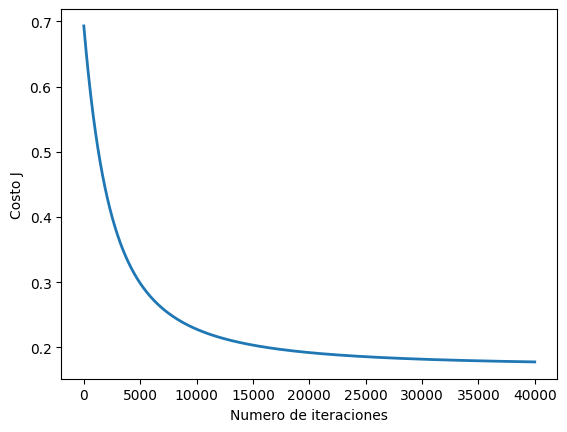

In [ ]:
alpha = 0.001
num_iters = 40000

num_features = X.shape[1]
theta = np.zeros(15)
print(theta)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)


pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Se aplica en X_tes la facturalizacion y se agregan las columna de unos

In [ ]:
X_test, mu, sigma = featureNormalize(X_test)
m, n = X_test.shape
X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)
aprueba = sigmoid(np.dot(X_test, theta))


# Test con el 20% de datos

In [ ]:
probabilidad = sigmoid(np.dot(X_test, theta))
resultado = decision(probabilidad)
print(resultado)

[0 0 0 ... 1 0 0]
